<h1>Chapter 3 - Dataset</h1> 

<h2>Table of Contents</h2>

<p>In sub-chapters 1-3, you will construct a basic dataset by using PyTorch and learn how to apply basic transformations to it.</p> 
<ol>
    <li><a href="#Simple_Dataset">Simple dataset</a></li>
    <li><a href="#Transforms">Transforms</a></li>
    <li><a href="#Compose">Compose</a></li>
</ol>
<p>In sub-chapters 4-5, you will build a dataset objects for images; many of the processes can be applied to a larger dataset. Then you will apply pre-build transforms from Torchvision Transforms to that dataset. In sub-chapters 6, you will see how to use prebuilt torchvision datasets.</p>
<ol start="4">
    <li><a href="#Dataset">Dataset Class</a></li>
    <li><a href="#Torchvision">Torchvision Transforms</a></li>
    <li><a href="#Torchvisionds">Torchvision Datasets</a></li> 
</ol>

In [1]:
# These are the libraries will be used for this lab.

import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

<h2 id="Simple_Dataset">Simple dataset</h2>

Let us try to create our own dataset class.

In [2]:
# Define class for dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 10, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

Now, let us create our <code>toy_set</code> object, and find out the value on index 1 and the length of the inital dataset

In [3]:
# Create Dataset Object. Find out the value on index 1. Find out the length of Dataset Object.
our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x00000295948943C8>
Value on index 0 of our toy_set object:  (tensor([2., 2.]), tensor([1.]))
Our toy_set length:  10


As a result, we can apply the same indexing convention as a <code>list</code>,
and apply the fuction <code>len</code> on the <code>toy_set</code> object. 

The <code>our_dataset[0]</code> calls <code>&#95;&#95;getitem&#95;&#95;</code> function with index 0 and <code>len()</code> calls <code>&#95;&#95;len&#95;&#95;</code> function. Hence, we are able to customize the indexing and length method by <code>def &#95;&#95;getitem&#95;&#95;(self, index)</code> and <code>def &#95;&#95;len&#95;&#95;(self)</code>.

Now, let us print out the first 3 elements and assign them to x and y:

In [4]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y=our_dataset[i]
    print("index: ", i, '; x:', x, '; y:', y)

index:  0 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  1 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  2 ; x: tensor([2., 2.]) ; y: tensor([1.])


The dataset object is an Iterable; as a result, we  apply the loop directly on the dataset object 

In [5]:
for x,y in our_dataset:
    print(' x:', x, 'y:', y)

 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])


<!--Empty Space for separating topics-->

<h2 id="Transforms">Transforms</h2>

You can also create a class for transforming the data. In this case, we will try to add 1 to x and multiply y by 2:

In [6]:
# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

Now, create a transform object:.

In [7]:
# Create an add_mult transform object, and an toy_set object
a_m = add_mult()
data_set = toy_set()

Assign the outputs of the original dataset to <code>x</code> and <code>y</code>. Then, apply the transform <code>add_mult</code> to the dataset and output the values as <code>x_</code> and <code>y_</code>, respectively.

<b>Note: <code>a_m()</code> calls the <code>&#95;&#95;call&#95;&#95;</code> function directly. </b>

In [8]:
# Use loop to print out first 3 elements in dataset
for i in range(3):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = a_m(data_set[i])
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])


As the result, <code>x</code> has been added by 1 and y has been multiplied by 2, as <i>[2, 2] + 1 = [3, 3]</i> and <i>[1] x 2 = [2]</i>

<!--Empty Space for separating topics-->

We can apply the transform object every time we create a new <code>toy_set object</code>? Remember, we have the constructor in toy_set class with the parameter <code>transform = None</code>.
When we create a new object using the constructor, we can assign the transform object to the parameter transform, as the following code demonstrates.

In [9]:
# Create a new data_set object with add_mult object as transform

cust_data_set = toy_set(transform = a_m)

This applied <code>a_m</code> object (a transform method) to every element in <code>cust_data_set</code> as initialized. Let us print out the first 10 elements in <code>cust_data_set</code> in order to see whether the <code>a_m</code> applied on <code>cust_data_set</code>

In [10]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])


The result is the same as the previous method.

<!--Empty Space for separating topics-->

<h2 id="Compose">Compose</h2>

You can compose multiple transforms on the dataset object. First, import <code>transforms</code> from <code>torchvision</code>:

In [11]:
# Run the command below when you do not have torchvision installed
# !conda install -y torchvision

from torchvision import transforms

Then, create a new transform class that multiplies each of the elements by 100: 

In [12]:
# Create tranform class mult
class mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

Now let us try to combine the transforms <code>add_mult</code> and <code>mult</code>

In [13]:
# Combine the add_mult() and mult()

data_transform = transforms.Compose([add_mult(), mult()])
print("The combination of transforms (Compose): ", data_transform)


The combination of transforms (Compose):  Compose(
)


The new <code>Compose</code> object will perform each transform concurrently as shown in this figure:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.3.1_trasform.png" width="500" alt="Compose PyTorch">

In [14]:
x,y=data_set[0]
x_,y_=data_transform(data_set[0])
print( 'Original x: ', x, 'Original y: ', y)

print( 'Transformed x_:', x_, 'Transformed y_:', y_)

Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Transformed x_: tensor([300., 300.]) Transformed y_: tensor([200.])


Now we can pass the new <code>Compose</code> object (The combination of methods <code>add_mult()</code> and <code>mult</code>) to the constructor for creating <code>toy_set</code> object.

In [15]:
# Create a new toy_set object with compose object as transform

compose_data_set = toy_set(transform = data_transform)

<!-- Blank -->

<h3>Preparation for sub-chapters 4-5</h3>

In [16]:
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import DataLoader
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

 The index.csv file has information regarding each image.
 You can load the CSV file and convert it into a dataframe , using the Pandas function <code>read_csv()</code> . You can view the dataframe using the method head.

In [17]:
# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. You can obtain the path of the first file by using the method  <code> <i>DATAFRAME</i>.iloc[0, 1]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index. 

The number of samples corresponds to the number of rows in a dataframe. You can obtain the number of rows using the following lines of code. This will correspond the data attribute <code>len</code>.

In [18]:
# Print out the total number of rows in traing dataset
print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


The next job is to load the image.

You can then use the function <code>Image.open</code> to store the image to the variable <code>image</code> and display the image and class.

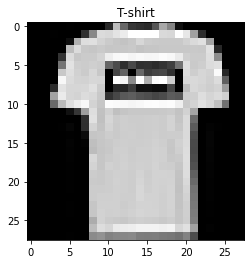

In [19]:
# Combine the directory path with file name
image_name =data_name.iloc[1, 1]
image_path=os.path.join(directory,image_name)

# Plot the second training image
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

<h2 id="Dataset">Dataset Class</h2>

In this section, we will use the components in the last section to build a dataset class and then create an object.

In [20]:
# Create your own dataset object
class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
    
    
    
# Create the dataset objects
dataset = Dataset(csv_file=csv_file, data_dir=directory)

Each sample of the image and the class y is stored in a tuple <code> dataset[sample]</code> . The image is the first element in the tuple <code> dataset[sample][0]</code> the label or class is the second element in the tuple <code> dataset[sample][1]</code>. For example you can plot the first image and class.

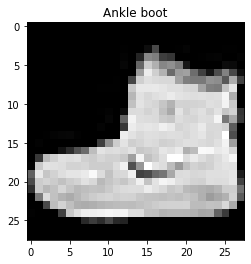

In [21]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

<h2 id="Torchvision"> Torchvision Transforms  </h2>

We can apply some image transform functions on the dataset object. The iamge can be cropped and converted to a tensor. We can use <code>transform.Compose</code> we learned from the previous lab to combine the two transform functions.

The shape of the first element tensor:  torch.Size([1, 20, 20])


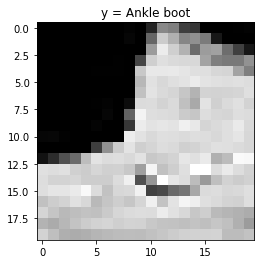

In [22]:
import torchvision.transforms as transforms

# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)

# Plot the first element in the dataset
show_data(dataset[0],shape = (20, 20))

We can see the image is now 20 x 20

<h2 id="Torchvisionds"> Torchvision Datasets  </h2>

We can import a prebuilt dataset. In this case, use MNIST.

In [34]:
import torchvision.datasets as dsets

# Show data by diagram
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

# # Import the prebuilt dataset into variable dataset
# dataset = dsets.MNIST(
#     root = './data', 
#     train = False, 
#     download = True, 
#     transform = transforms.ToTensor()
# )

Each element of the dataset object contains a tuple. Let us see whether the first element in the dataset is a tuple and what is in it.

In [31]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?
print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  7
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


As shown in the output, the first element in the tuple is a cuboid tensor. As you can see, there is a dimension with only size 1, so basically, it is a rectangular tensor.<br>
The second element in the tuple is a number tensor, which indicate the real number the image shows. As the second element in the tuple is <code>tensor(7)</code>, the image should show a hand-written 7.

Let us plot the first element in the dataset:

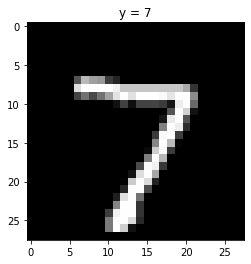

In [35]:
# Plot the first element in the dataset
show_data(dataset[0])